- bias variance tradeoff
- over and underfitting
- regularization on regression: Ridge, Lasso, ElasticNet

## Regularization

![](https://images.unsplash.com/photo-1528056956515-10faa96ba227?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1052&q=80)
Picture by [Mel Poole](https://unsplash.com/photos/ToI01Apo4Pk)

___

Today we will talk about bias and variance, and how to improve the performances of our algorithms using these concepts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# I. Bias vs Variance

## I.1. The intuition

> 📚 **Resources**: For a more in-depth explanation of the topic, I recommend [this on-point explanation](https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/)

> 🏆 **Quizz**

<img src="https://drive.google.com/uc?export=view&id=1yHalKWkEF-h-HIOf3l7V7kFBWDQy1zXt" width="700px">

> ✅ **Answer**: A good model is a model capable of **generalizing** the problem (and therefore to generalize some solution)
>
> If we continue the student/exam methaphor, **overfitting** would be like **cramming**, and **underfitting** would be like **giving too broad answers at the exam** (bullshitting 🙄).
>
> <img src="https://drive.google.com/uc?export=view&id=1zp3-OvgyEEkXhpNV_qIbeZrns7vGOBWq" width="800px" align="center"/>

Bias and variance manifest a little differently depending on wether the task at hand is a **classification** or a **regression**, but the underlying causes are the same.

- In a **classification problem** :
<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1MQD5UZigevDU4542iMpPJZWardglwQyO">
</p>

- In a **regression problem** :
<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1yT0bXLUs0fJvVLjhWumndL2FPaRSv2zk">
</p>

## I.2. The Bias-Variance compromise

Another way of seeing it, would be to look at this chart:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1cRT8QaY8kWWauZJ9iWCVRk6CkfBhv7Xr" width="600">
</p>

But why is it called **Bias** and **Variance**? Let's consider an archer aiming for a target 🎯

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1KD2aWehs1RpHxnYlwbi0ghwykSZqJYiy" width="500">
</p>

## I.3. Underfitting vs Overfitting

- **High variance** means you **overfit**: basically your are too close to the training data, you won't be able to generalize well.

- **High bias** means your model **does not fit your data**. No matter how hard you try, you won't be able to perform good predictions.

## I.4. How to diagnose it?

High variance has to be diagnosed by looking at the performance of your model on the train and the validation dataset (one more reason to split your data!).

➡️ Let's say we want to perform a binary classification between images of dogs and cats.
Let's assume we have the following results with one of our models:

|  Split  | Accuracy |
|---------|----------|
|  Train  |   98 %   |
|  Validation  |   73 %   |

> Here, we clearly have a **high variance**. So no, it's not good at all! Our results are really good on the training set, but do not generalize, and thus give poor results on the validation set.

➡️ Now we have made some changes, and we have those new results:


|  Split  | Accuracy |
|---------|----------|
|  Train  |   76 %   |
|  Validation  |   75 %   |


> This time, we most likely have a **high bias**. Both training and validation datasets provide poor results.

➡️ Finally, we use one of the best possible model, with an optimized set of hyperparameters, and we get the following results :

|  Split  | Accuracy |
|---------|----------|
|  Train  |   96 %   |
|  Valid  |   95 %   |

> This time, our model seems to be good!

⚠️ Note: as you can see, without any knowledge of the expected performances, you may think the high bias results are good enough. You must **always try to improve your model** after the first result.

## I.5 How to fix it ?

### I.5.A. Fixing underfitting (e.g. fixing high bias)

What can you do to fix a high bias ?

Here is a list of possible options :
* **Add more features** (e.g. square of input features, combination of features...), through feature engineering or by collecting new informations on our data through scrapping or APIs.
* Try a **more complex model**.
* **Reduce regularization** (if any)

### I.5.B. Fixing overfitting (e.g. fixing high variance)

To fix high variance, on the other hand, here are the main leads:
* **Add more training data**
* **Remove extra features** (if any)
* **Decrease complexity of your model**
* **Add regularization**

# II. Regularization

Regularization **does NOT** improve the **training** performance. However, it can improve the **generalization** performance in test.

## II.1 Ridge regression

Regularization is a way to modify the bias and variance of our models. In most of the models, we will only need to play with a positive parameter. The idea is to optimize our model by adding a **global weight** to the cost function, which effect is to **lower** the values of the model **parameters**.

> *Ridge Regression* penalizes high parameter values and reduces parameter values. Therefore, our end model is more robust and less likely to overfit.

For example, here is the cost function of a linear regression $h_\theta(x) = \theta_0 + \theta_1 x$ over *m* points:

$$ J = \frac{1}{2m}\sum_i (h_\theta(x^i) - y^i)^2 = \frac{1}{2m}\sum_i (\theta_0 + \theta_1 x^i - y^i)^2$$

To perform some regularization, the term $\lambda |\theta|^2$ is added at the end:

$$ J = \frac{1}{2m}\sum_i (h_\theta(x^i) - y^i)^2 + \lambda |\theta|^2 = \frac{1}{2m}\sum_i (\theta_0 + \theta_1 x^i - y^i)^2 + \lambda(\theta_0^2 + \theta_1^2)$$

This is called a **Ridge Regression** (or **L2** regularization) and $\lambda$ is our regularization parameter.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1fomvSycAtYnIVpEinfZvUioYz4ZjIRy5">
</p> 

The Ridge regression can easily be implemented in `scikit-learn`, with the following signature:

`class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, random_state=None)`

(here, the parameter `alpha` is the regularization parameter).

## II.2 LASSO Regression

The **LASSO Regression** (*Least Absolute Shrinkage and Selection Operator*) does not add **quadratic** (square) values to the cost function, but **absolute** values: $\lambda |\theta|$.

Following our previous example of linear regression $h_\theta(x) = \theta_0 + \theta_1 x$, the cost function is now:

$$ J = \frac{1}{2m}\sum_i (h_\theta(x^i) - y^i)^2 + \lambda |\theta| = \frac{1}{2m}\sum_i (\theta_0 + \theta_1 x^i - y^i)^2 + \lambda(|\theta_0| + |\theta_1|)$$

This is called a **LASSO Regression** (or **L1** regularization) and $\lambda$ is our regularization parameter.

> *Lasso Regression* sets parameters to 0 much more quickly. It is used for feature selection too.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1w0aMoRPntloGzNXTfE1vmd9W_m1Hd7Lx">
</p>


The LASSO regression can easily be implemented in `scikit-learn`, with the following signature:

`class sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)`

(here, the parameter `alpha` is the regularization parameter).

Intuitively:
* if $\lambda$ = 0: there is no regularization, too complex models may overfit
* if $\lambda$ is large: high regularization, all $\theta$ values will tend to 0, models may have a high bias

## II.3 SVM and regularization

Regularization is also available with SVM, some of you probably already used it in hyperparameters optimization. The regularization parameter (lambda) reflects the importance that is given to miss-classified examples.

In the signature of the SVM classifier on `scikit-learn`, the regularization parameter is called `C`:

`class sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)`

Warning: in the SVM classifier, `C=1.0` means no regularization, while `C<<1` means high regularization.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1kp1gLJYlDlkQ6R60zyES1A_QVEgl3d56">
</p>

## II.4. Logistic Regression and regularization

Regularization can also be used with a Logistic Regression.
In the signature of the Logistic Regression on `scikit-learn`, the regularization parameter is called `C`, like the SVM:

`class sklearn.linear_model.LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None)[source]`

Unlike the SVM, you can choose the penalty type: either `penalty=’l2’` or `penalty=’l1’`, meaning the regularization is done either on squared parameters (like in Ridge) or on absolute values (like in LASSO).

Again, warning: `C=1.0` means no regularization, while `C<<1` means high regularization.

## II.5. Random Forest

Random Forest does not have a regularization parameter such as the ones for SVM and regression, but you can play with the parameters to reduce the variance, especially the `max_depth`.

# III. Application

## III.1 Input data

We will see how to apply regularization methods on an example.

Let's use the following data:

[]

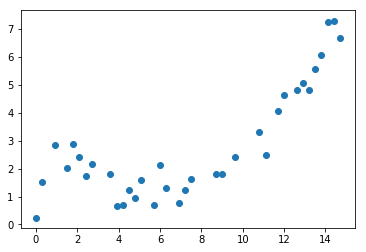

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Let's create the data
X = np.arange(0, 15, 0.3)
y = 4*np.sqrt(X) - 2*X + 0.1*X*X + np.random.normal(0, .5, len(X))

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Plot the data
plt.scatter(X_train, y_train)
plt.plot()

## III.2 High bias

Let's first try to use a normal linear regression.

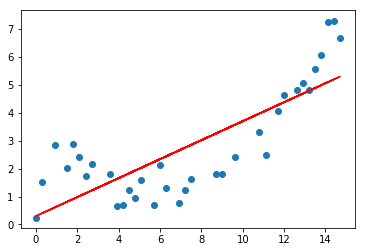

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train.reshape(-1, 1), y_train)

y_train_pred = reg.predict(X_train.reshape(-1, 1))

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, color='red')
plt.show()

This is a good example of high bias: as you can see, the results are not very good.

Let's check the mean squared error on the train and test sets:

In [8]:
from sklearn.metrics import mean_squared_error

print('MSE on train:', mean_squared_error(y_train, y_train_pred))
print('MSE on test:', mean_squared_error(y_test, reg.predict(X_test.reshape(-1, 1))))

MSE on train: 1.4580509955479881
MSE on test: 1.4109194023707592


As you can see, the Mean Squared Error (MSE) is the same on both sets, and pretty bad.

Let's now try to add more features to reduce the bias.

## III.3 High variance

Instead of trying to fit only on X, we will fit on X, X$^2$, X$^3$, X$^4$, X$^5$, X$^6$, X$^7$, X$^8$, X$^9$ and see how it works!

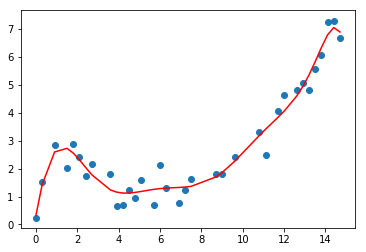

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

def powerize(X_train):
    return np.transpose(np.array([X_train, np.power(X_train, 2), np.power(X_train, 3), 
                        np.power(X_train, 4), np.power(X_train, 5), np.power(X_train, 6),
                        np.power(X_train, 7), np.power(X_train, 8), np.power(X_train, 9)]))

reg.fit(powerize(X_train), y_train)

y_train_pred = reg.predict(powerize(np.sort(X_train)))

plt.scatter(X_train, y_train)
plt.plot(np.sort(X_train), y_train_pred, color='red')
plt.show()

Okay it seems better this way, at least there is no bias! Let's check how it performs on the test set:

In [25]:
print('MSE on train:', mean_squared_error(y_train, reg.predict(powerize(X_train))))
print('MSE on test:', mean_squared_error(y_test, reg.predict(powerize(X_test))))

MSE on train: 0.15614406160150252
MSE on test: 0.2313511920283571


Okay we reached a huge improvement compared to previously on both train and test, meaning we were clearly having a high bias.

Still, the MSE is close to 50 % higher on our test set, we should improve that. For the sake of the exercise, we will try to add regularization (although here, we could clearly reduce the number of features...).

Let's try the Ridge and LASSO regressions!

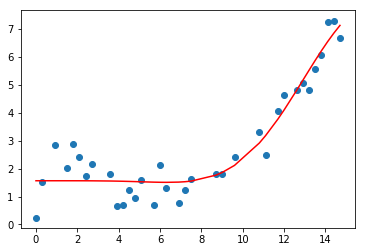

In [26]:
from sklearn.linear_model import Ridge

# Let's try first with a very large regularization and see what it does
ridge = Ridge(alpha=1000000000)

ridge.fit(powerize(X_train), y_train)

y_train_pred = ridge.predict(powerize(np.sort(X_train)))

plt.scatter(X_train, y_train)
plt.plot(np.sort(X_train), y_train_pred, color='red')
plt.show()

Okay, too much regularization: we actually added bias here by regularization!
Let's try a much lower value now:

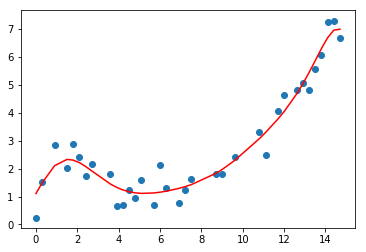

In [12]:
# Let's try with a much lower regularization and see what it does
ridge = Ridge(alpha=0.5)

ridge.fit(powerize(X_train), y_train)

y_train_pred = ridge.predict(powerize(np.sort(X_train)))

plt.scatter(X_train, y_train)
plt.plot(np.sort(X_train), y_train_pred, color='red')
plt.show()

That looks better, let's see if it helped decreasing the MSE of the test dataset:

In [14]:
print('MSE on train:', mean_squared_error(y_train, ridge.predict(powerize(X_train))))
print('MSE on test:', mean_squared_error(y_test, ridge.predict(powerize(X_test))))

MSE on train: 0.19469757190148054
MSE on test: 0.18587919175346215


Quite an improvement, right?

Just out of curiosity, let's try now to do the same with LASSO regularization:

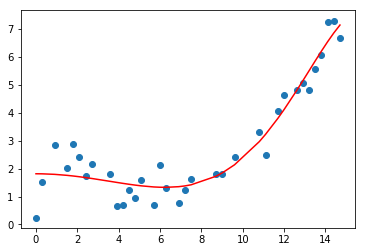

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.5)

lasso.fit(powerize(X_train), y_train)

y_train_pred = lasso.predict(powerize(np.sort(X_train)))

plt.scatter(X_train, y_train)
plt.plot(np.sort(X_train), y_train_pred, color='red')
plt.show()

In [28]:
print('MSE on train:', mean_squared_error(y_train, lasso.predict(powerize(X_train))))
print('MSE on test:', mean_squared_error(y_test, lasso.predict(powerize(X_test))))

MSE on train: 0.3285433988517019
MSE on test: 0.20624203217927584


Well, not as good as the Ridge regression. But actually, to do it right, we should have conducted an hyperparamer optimization using a `GridSearchCV` or `RandomizedSearchCV` on more than one hyperparameter.

---
In a nutshell : 

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1fxb48WwVmZsBEr-MEJRUF0YdZvK-o5zA">
</p>

Or, in a more visual way :

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=118s1aYXhuptWpf1KPyOxmR9PZLv_6TNr" width="600">
</p>

## Regression 🏡

Today we will focus on **Regression** problems - which means **Supervised** (with labeled data) and for **continuous data** (as opposed to Classification problems which work with labeled and discrete data)

---

![](https://drive.google.com/uc?export=view&id=1WzJHRSddrqk-9yVtBqOXramV8BYhV9O7)

---

# I. Intuition

## I.1. Regression problems apply to *continuous* data

Regression problems apply to **continuous** data.

Let's do a quiz and explore different problems to understand what we mean by **continuous** data.

> 🏆 **Quiz**: 
> 1. In ML, we always have input variable(s) and output variable(s). Does **continuous** refers to the input or the output?
> 2. If we want to predict the **age** of somebody, is the data **continuous** or **discrete**?
> 3. If we want to predict the **weather** tomorrow, is the data **continuous** or **discrete**?
> 4. If we want to predict the **phone number** of someone, is the data **continuous** or **discrete**?

## I.2. Linear Regression

Suppose we draw some points representing the price of a house along the Y-axis, and the surface of that house along the X-axis.

![](https://drive.google.com/uc?export=view&id=1CacbYF-z8em8owaXGtr1mv_FYS2pP86R)

> 🏆 **Quiz**:
> - What would be the "best line" to represent this data?
> - What would be the equation representing this line?

House Price = 10000 * Surface + 5000

- `House Price` is the **target**
- `Surface` is the **input**
- `10000` is the **slope**
- `5000` is the **intercept**

The **slope** and the **intercept** are called the **parameters** of our model. They are the values that the model **learns** during training (iteratively).

Or, if you want to write it mathematically:
$$y = \theta_1 \times x + \theta_0$$


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1Fvj1gx40E0M4mJOuC_SGFa427DCrtnL9">
</p>

## I.3. Now, it's time for predictions! 🔮

Imagine we are a house agent, listing properties and we need to price a new house that someone wants to sell.

Based on the previous "best line" drawed, how much would we price a flat of 50m2? 

Congratulations! You just discovered **Linear Regression**, a super powerful yet simple algorithm for Regression models. Let's now implement it in `scikit-learn`.

---

# II. Easy to implement with [`scikit-learn`](https://scikit-learn.org)

Again, `scikit-learn` makes it very easy to create and train a Regression model in Python.

Lucky us! `scikit-learn` comes with a standard dataset containing real estate data (house characteristics and prices in Boston). 🏡

Let's load this dataset and visualize it on a 2D chart.

In [1]:
# We load Boston house prices
# Reference https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

# We keep only the feature at index 5 (corresponds to the "Average Number of Rooms")
# for visualisation purposes
i = 5
X = X[:,i:i+1]

In [4]:
print("X.shape={}".format(X.shape))
print("y.shape={}".format(y.shape))

X.shape=(506, 1)
y.shape=(506,)


In [5]:
from matplotlib import pyplot as plt

# Create figure to draw chart
plt.figure(figsize=(10, 8))

# Plot the training points
plt.scatter(X, y)

# Format chart
plt.xlabel('Average Number of Rooms')
plt.ylabel('Price')
plt.show()

<Figure size 1000x800 with 1 Axes>

In [6]:
from sklearn.linear_model import LinearRegression 

# Create linear regression object
lr = LinearRegression()

In [7]:
# Train the model using only the first feature of X (Surface)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Make predictions based on train model
y_pred = lr.predict(X)

# Display coefficient and intercept
print('Coefficients: ', lr.coef_) # See how coefficients are in a list, as there can be multiple values for them
print('Intercept: ', lr.intercept_) # Intercept is a single value (always)

Coefficients:  [9.10210898]
Intercept:  -34.67062077643857


Let's now plot both the points used for training and the linear regression

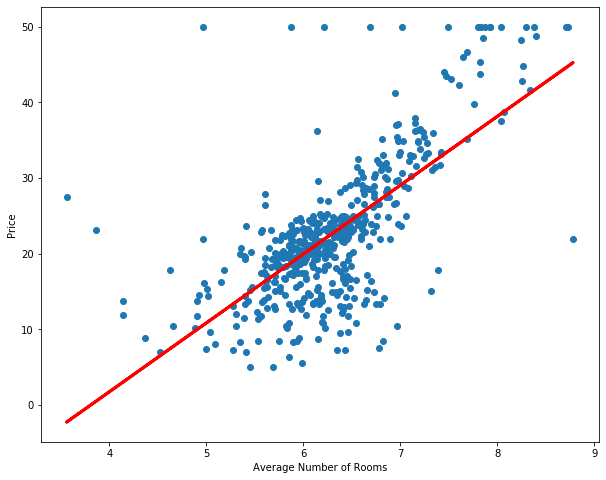

In [9]:
# Create figure to draw chart
plt.figure(2, figsize=(10, 8))

# Plot the training points
plt.scatter(X[:, 0], y)
plt.plot(X[:, 0], y_pred, color='red', linewidth=3)

plt.xlabel('Average Number of Rooms')
plt.ylabel('Price')

plt.show()

In [10]:
#We import from scikit learn the mean_squared_error
from sklearn.metrics import mean_squared_error
#we use it to measure the mean squared error betweenthe target and our predictions
mse = mean_squared_error(y, y_pred)
#The smaller the model is, the better the model is
print(mse)

43.60055177116956


---